In [17]:
import pandas as pd
import seaborn as sns
import numpy as np

In [29]:
df = pd.read_csv('Datasets/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


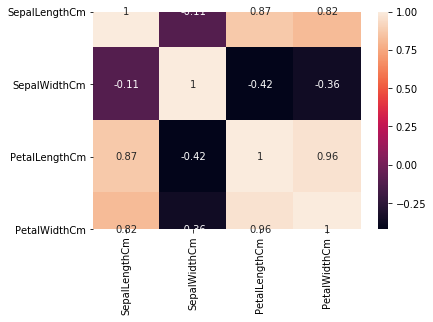

In [32]:
df = df.drop(columns=['Id', 'Species'])
sns.heatmap(df.corr(), annot=True)

In [20]:
def corr_between(x ,y):
    '''x and y are lists, this returns the correlation between them'''
    sum1, sum2, sum3 = 0, 0, 0
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    # numerator
    for i in range(len(x)):
        x_i, y_i = x[i], y[i]
        x_i -= x_mean
        y_i -= y_mean
        sum += x_i * y_i
     # first part of denominator
    for i in range(len(x)):
        x_i = x[i]
        x_i -= 0
        sum2 += x_i**2

        
    return 

def pearson_corr(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    num = [(i - x_mean)*(j - y_mean) for i,j in zip(x,y)]
    den_1 = [(i - x_mean)**2 for i in x]
    den_2 = [(j - y_mean)**2 for j in y]
    correlation_x_y = np.sum(num)/np.sqrt(np.sum(den_1))/np.sqrt(np.sum(den_2))
    return correlation_x_y

In [21]:
# solution from Milad
def pearson_corr(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    num = [(i - x_mean)*(j - y_mean) for i,j in zip(x,y)]
    den_1 = [(i - x_mean)**2 for i in x]
    den_2 = [(j - y_mean)**2 for j in y]
    correlation_x_y = np.sum(num)/np.sqrt(np.sum(den_1))/np.sqrt(np.sum(den_2))
    return correlation_x_y

In [33]:
# the 6 possible correlations in the Iris dataset
print(pearson_corr(df['SepalLengthCm'], df['SepalWidthCm']))
print(pearson_corr(df['SepalLengthCm'], df['PetalLengthCm']))
print(pearson_corr(df['SepalLengthCm'], df['PetalWidthCm']))
print(pearson_corr(df['SepalWidthCm'], df['PetalWidthCm']))
print(pearson_corr(df['SepalWidthCm'], df['PetalLengthCm']))
print(pearson_corr(df['PetalLengthCm'], df['PetalWidthCm']))

-0.10936924995064938
0.8717541573048714
0.8179536333691633
-0.35654408961380585
-0.4205160964011545
0.9627570970509661


In [34]:
corr = [
    pearson_corr(df['SepalLengthCm'], df['SepalWidthCm']),
    pearson_corr(df['SepalLengthCm'], df['PetalLengthCm']),
    pearson_corr(df['SepalLengthCm'], df['PetalWidthCm']),
    pearson_corr(df['SepalWidthCm'], df['PetalWidthCm']),
    pearson_corr(df['SepalWidthCm'], df['PetalLengthCm']),
    pearson_corr(df['PetalLengthCm'], df['PetalWidthCm']),
]

sns.heatmap(corr, annot=True)

IndexError: Inconsistent shape between the condition and the input (got (6, 1) and (6,))

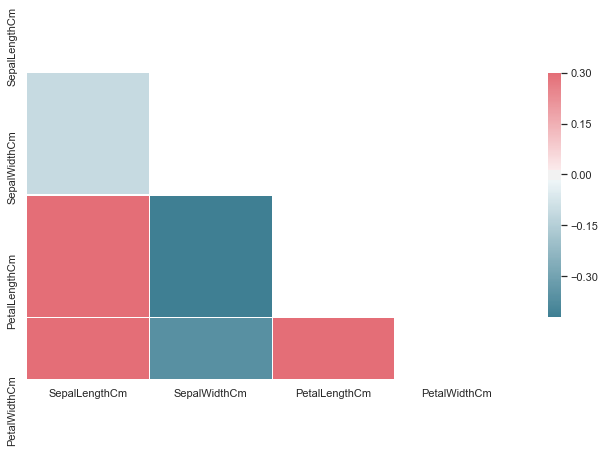

In [37]:
# and now, here's how to do the same, but msking seaborn do it for us using heatmaps!

sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
pd.crosstab(df['PetalWidthCm'], df[])